## Hastings Direct Assessment

In [1314]:
import pandas as pd

In [1315]:
df = pd.read_csv('./DS_Assessment.csv')

In [1316]:
def explore(data):
    summaryDf = pd.DataFrame(data.dtypes, columns=['dtypes'])
    summaryDf = summaryDf.reset_index()
    summaryDf['Name'] = summaryDf['index']
    summaryDf['Missing'] = data.isnull().sum().values
    summaryDf['Total'] = data.count().values
    summaryDf['MissPerc'] = (summaryDf['Missing']/data.shape[0])*100
    summaryDf['NumUnique'] = data.nunique().values
    summaryDf['UniqueVals'] = [data[col].unique() for col in data.columns]
    print(summaryDf.head(30))

In [1317]:
explore(df)

             index   dtypes            Name  Missing  Total  MissPerc  \
0              Age  float64             Age      483  49517     0.966   
1        Veh_Value  float64       Veh_Value      525  49475     1.050   
2              Tax  float64             Tax      517  49483     1.034   
3            Price  float64           Price      515  49485     1.030   
4      Veh_Mileage  float64     Veh_Mileage      509  49491     1.018   
5     Credit_Score  float64    Credit_Score      497  49503     0.994   
6   License_Length  float64  License_Length      498  49502     0.996   
7             Date   object            Date      497  49503     0.994   
8   Marital_Status   object  Marital_Status      483  49517     0.966   
9     Payment_Type   object    Payment_Type      484  49516     0.968   
10    Veh_Reg_Year  float64    Veh_Reg_Year      488  49512     0.976   
11            Sale    int64            Sale        0  50000     0.000   

    NumUnique                                     

In [1318]:
df.head(10)

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Date,Marital_Status,Payment_Type,Veh_Reg_Year,Sale
0,68.234601,4385.559975,10.726928,395.881843,7299.380077,366.105677,8.711803,2016-05-14,M,Installments,2017.0,0
1,32.066145,6246.182948,7.869344,534.441400,5887.218868,306.560408,8.754815,2016-06-30,S,Cash,2015.0,0
2,52.039464,5753.093177,9.112318,472.386504,6327.126420,430.070380,6.942515,2016-10-02,M,Installments,2014.0,0
3,51.918920,5674.321541,11.657723,355.692599,7349.979218,493.840343,9.165431,2016-04-06,S,Cash,2011.0,0
4,28.472248,6674.864994,9.309519,327.209088,5471.606750,416.459533,6.810972,2016-10-14,S,Installments,2013.0,0
5,64.510299,7011.869761,12.885478,450.985258,7655.297440,376.064095,11.386787,2016-10-01,M,Cash,2013.0,0
6,61.594223,6185.473889,13.298141,423.213865,9166.468761,267.728480,8.043216,2016-12-22,M,Cash,2012.0,0
7,42.030555,5850.808973,8.970335,408.629620,5385.025061,356.708034,7.069777,2016-06-18,M,Installments,2015.0,0
8,40.692663,5449.655218,10.828371,456.473931,8675.226107,364.041093,9.715375,2016-03-27,S,Cash,2017.0,0
9,47.976908,5131.914728,9.595796,433.613970,7068.875839,284.350640,8.925822,2016-02-18,M,Installments,2012.0,0


## Exploratory Analysis

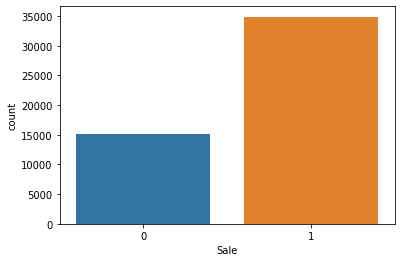

In [1319]:
import seaborn as sns

sns.countplot(df.Sale)

Defining Chi Test for categorical features. This method returns the p value, a value in between 0 and 1, with 0 implying there is a strong relationship between the categorical feature in question and 1 implying the opposite.

In [1320]:
from scipy import stats
import numpy as np

def chi2_cat_test(df, cat_var):
    vals = df.groupby([cat_var, 'Sale']).Sale.count().unstack().values
    p = stats.chi2_contingency(vals)
    print('p value of', np.round(p[1], 3), 'for variable', cat_var)
    
def chi2_feat_test(df, cat_var, target_var):
    vals = df.groupby([cat_var, target_var]).Sale.count().unstack().values
    p = stats.chi2_contingency(vals)
    print('p value of', np.round(p[1], 3), 'for variable', cat_var)

Correlation plot for continuous variables

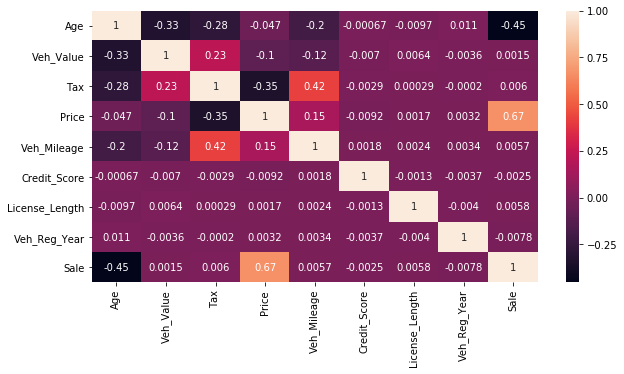

In [1321]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr, annot=True)

Pair plot for continuous variables from overall dataframe

In [1322]:
df_nona = df.dropna()
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_nona.Sale.replace(target_mapping, inplace=True)
# sns.pairplot(df_nona, hue='Sale')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1323]:
df_nosale = df.loc[df.Sale==0]
df_sale = df.loc[df.Sale==1]

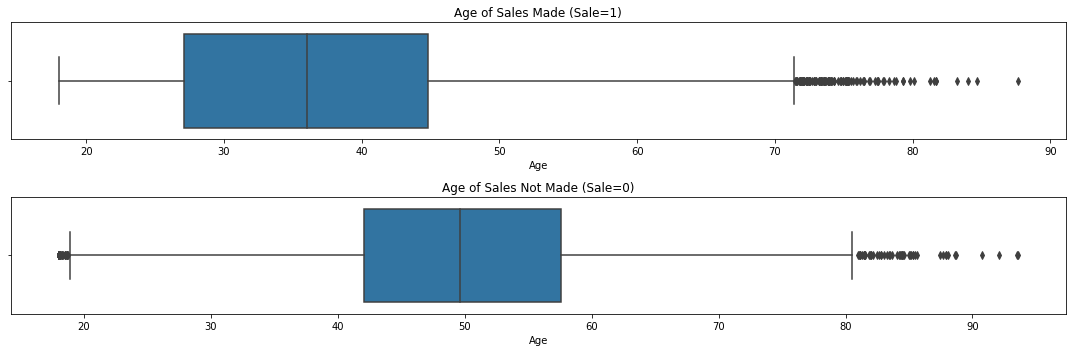

In [1324]:
# ages - sales made/not made

fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
ax1 = sns.boxplot(df_sale.Age)
ax1.title.set_text('Age of Sales Made (Sale=1)')
plt.subplot(2,1,2)
ax2 = sns.boxplot(df_nosale.Age)
ax2.title.set_text('Age of Sales Not Made (Sale=0)')
fig.tight_layout()
plt.show()


In [1325]:
from scipy.stats import pearsonr

pearsonr(df.dropna().Age, df.dropna().Sale)[0]

-0.45357148951891024

The previous value is Pearson's correlation coefficient. This implies that the two variables have an inverse relationship, i.e. as one decreases the other increases. Let's investigate this by binning the age feature and taking a closer look at which sales were completed.

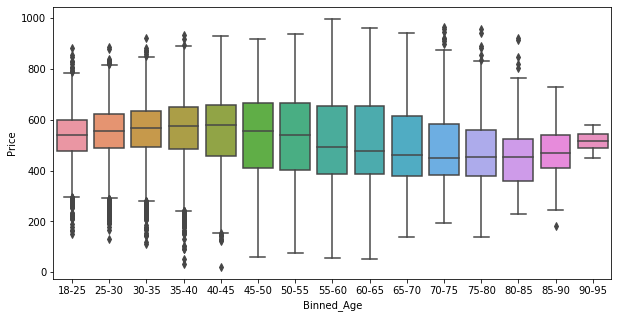

In [1326]:
bins = [18,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
labels = ['18-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95']
df['Binned_Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(10,5))
sns.boxplot(x='Binned_Age', y='Price', data=df)

This shows the decreasing price in terms of quartiles with respect to the binned Ages.

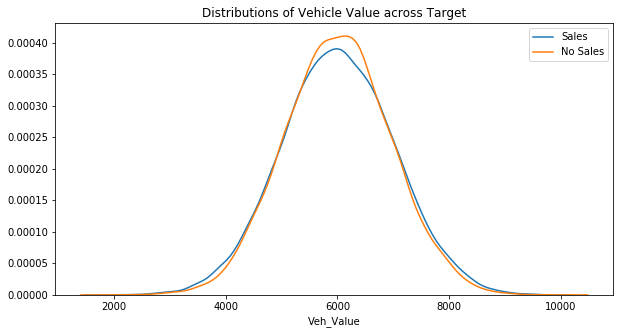

In [1327]:
# vehicle value - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Veh_Value.isnull()].Veh_Value, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Veh_Value.isnull()].Veh_Value, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Value across Target')
plt.legend()
plt.show()

In [1328]:
np.round(pearsonr(df.dropna().Veh_Value, df.dropna().Sale)[0],3)

-0.043

Nearly no relationship between vehicle value and Sale

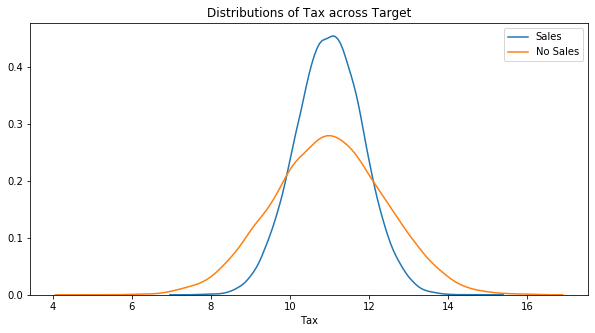

In [1329]:
# tax - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Tax.isnull()].Tax, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Tax.isnull()].Tax, hist=False, label='No Sales')
plt.title('Distributions of Tax across Target')
plt.legend()
plt.show()

Taking a further look at tax and vehicle value, especially the relationship between the two.

In [1330]:
np.round(pearsonr(df.dropna().Tax, df.dropna().Sale)[0],3)

-0.045

Also nearly no relationship between Tax and Sale

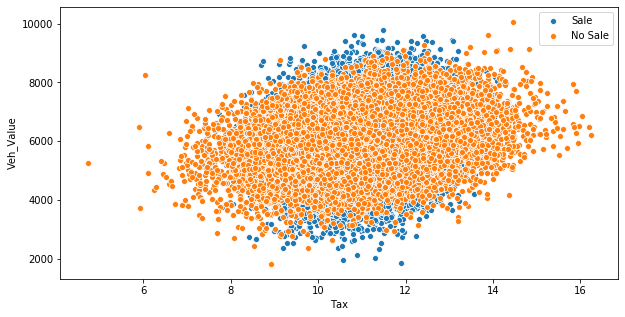

In [1331]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tax', y='Veh_Value', data=df_sale, label='Sale')
sns.scatterplot(x='Tax', y='Veh_Value', data=df_nosale, label='No Sale')
plt.legend()
plt.show()

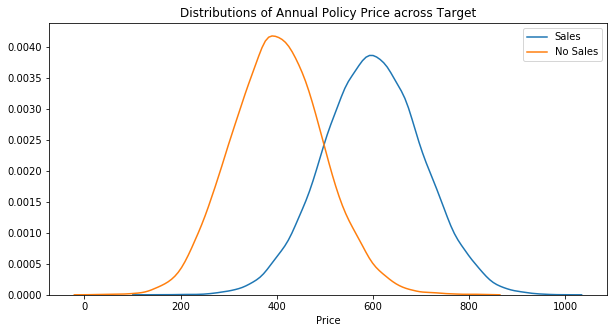

In [1332]:
# price - sales made/not made

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_sale.loc[~df_sale.Price.isnull()].Price, hist=False, label='Sales')
ax2 = sns.distplot(df_nosale.loc[~df_nosale.Price.isnull()].Price, hist=False, label='No Sales')
plt.title('Distributions of Annual Policy Price across Target')
plt.legend()
plt.show()

In [1333]:
np.round(pearsonr(df.dropna().Price, df.dropna().Sale)[0],3)

0.7

The largest correlation seen so far between a feature and the Target (Sale). Logically, this makes sense as the Price should have a large affect on a Sale happening or not.

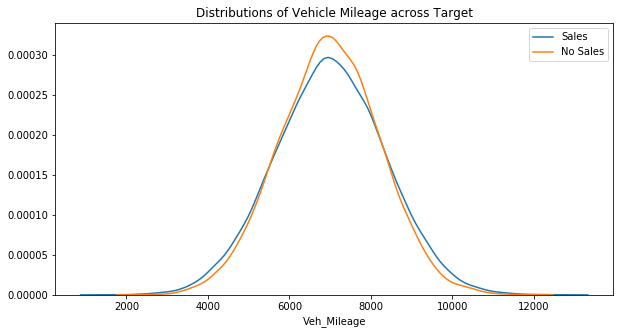

In [1334]:
# vehicle mileage - sales made/not made
df_vehmil = df.loc[~df.Veh_Mileage.isnull()]

fig = plt.figure(figsize=(10,5))
ax1 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==1].Veh_Mileage, hist=False, label='Sales')
ax2 = sns.distplot(df_vehmil.loc[df_vehmil.Sale==0].Veh_Mileage, hist=False, label='No Sales')
plt.title('Distributions of Vehicle Mileage across Target')
plt.legend()
plt.show()

In [1335]:
np.round(pearsonr(df.dropna().Veh_Mileage, df.dropna().Sale)[0],3)

-0.023

Nearly no relationship between Vehicle Mileage and Sale.

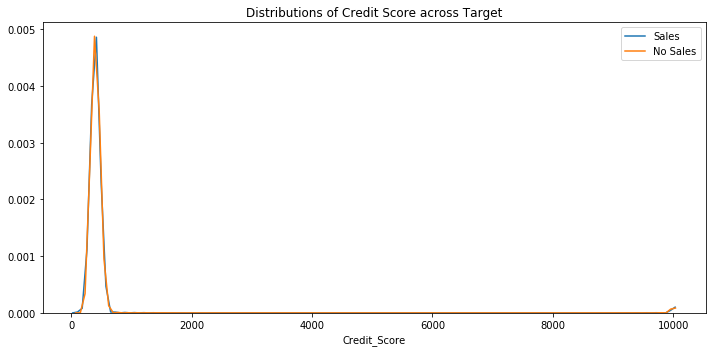

In [1336]:
# credit score - sales made/not made

df_cs = df.loc[~df.Credit_Score.isnull()]

fig = plt.figure(figsize=(10,5))
# plt.subplot(2,1,1)
ax1 = sns.distplot(df_cs.loc[df_cs.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs.loc[df_cs.Sale==0].Credit_Score, hist=False, label='No Sales')

# plt.subplot(2,1,2)
# sns.boxplot(x='Credit_Score', y='Sale', data=df_cs)
plt.title('Distributions of Credit Score across Target')
plt.legend()
fig.tight_layout()
plt.show()

In [1337]:
np.round(pearsonr(df.dropna().Credit_Score, df.dropna().Sale)[0],3)

-0.002

No relationship between Credit Score and Sale.

Credit Score values are usually in the range 1-1000, therefore we can safely say that what is being seen here on the right of the graph is incorrect (some clients have credit scores of 9999). I couldn't find any information on what ranges Hastings Direct uses to define their credit score values, therefore I will need to pick from the three most popular ones: 
* 0-710 with TransUnion
* 0-999 with Experian
* 0-700 with Equifax.

Firstly I will have a look at those clients with an abnormally high credit score.

In [1338]:
df_cs_high = df.loc[df.Credit_Score==9999]
target_mapping = {
    0: 'No Sale',
    1: 'Sale'
}
df_cs_high.Sale.replace(target_mapping, inplace=True)
# sns.pairplot(df_cs_high.dropna().drop('Credit_Score', axis=1), hue='Sale')



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


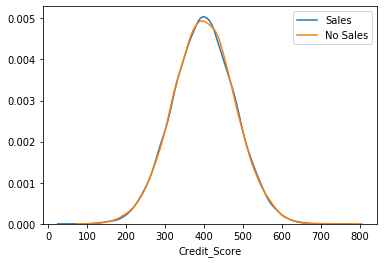

In [1339]:
df_cs_nothigh = df.loc[(~df.Credit_Score.isnull()) & (df.Credit_Score != 9999)]
ax1 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==1].Credit_Score, hist=False, label='Sales')
ax2 = sns.distplot(df_cs_nothigh.loc[df_cs_nothigh.Sale==0].Credit_Score, hist=False, label='No Sales')


In [1340]:
df_cs_nothigh.Credit_Score.describe()


count    49003.000000
mean       399.322936
std         79.666780
min         55.887237
25%        345.705352
50%        399.247291
75%        453.015683
max        769.338103
Name: Credit_Score, dtype: float64

The max in this dataframe (without those customers with a Credit Score of 9999) is seen to be 769.33. Therefore it is assumed that the credit score range is like that of Experian so all Credit Scores with a value of 9999 are to be set as 999.

In [1341]:
df.loc[df.Credit_Score==9999, 'Credit_Score'] = 999


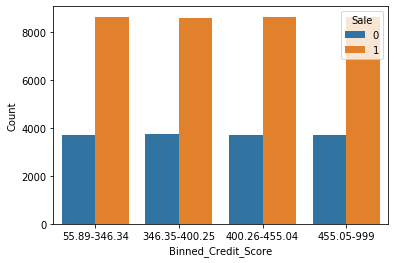

In [1342]:
bins = [df.Credit_Score.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = ['55.89-346.34', '346.35-400.25', '400.26-455.04', '455.05-999']
df['Binned_Credit_Score'] = pd.cut(df['Credit_Score'], bins=bins, labels=labels)
cs_df = df.groupby(['Binned_Credit_Score', 'Sale']).size().reset_index(name='Count')
sns.barplot(x='Binned_Credit_Score', y='Count', hue='Sale', data=cs_df)

In [1343]:
df.loc[df.Date.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Date,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Binned_Age,Binned_Credit_Score
29,44.899473,6834.435300,9.327742,444.031613,5922.570651,327.593791,5.259217,NaN,S,Installments,2009.0,0,40-45,55.89-346.34
166,57.067375,6742.141383,9.408536,564.822916,6274.953349,344.409139,4.358438,NaN,M,Cash,2013.0,0,55-60,55.89-346.34
210,30.627134,5608.754448,8.988230,369.960101,5636.843613,489.263752,5.959063,NaN,M,Installments,2012.0,0,30-35,455.05-999
222,57.924441,5344.483001,9.577831,381.982192,5274.393311,479.814374,8.040945,NaN,M,Installments,2011.0,0,55-60,455.05-999
392,65.371525,4909.686211,11.222580,494.766151,8632.072938,244.735204,8.657621,NaN,D,Installments,2014.0,0,65-70,55.89-346.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49356,41.487045,5534.011526,10.745116,651.960430,6873.738232,343.805171,3.535581,NaN,M,Installments,2013.0,1,40-45,55.89-346.34
49426,24.314083,7500.664428,12.360540,554.762190,6328.654906,505.620482,8.318179,NaN,S,Cash,2015.0,1,18-25,455.05-999
49592,37.723476,5464.888708,10.984536,711.918541,8871.557982,387.132768,7.086300,NaN,M,Cash,2012.0,1,35-40,346.35-400.25
49830,53.142906,4809.228073,9.719116,722.761000,7409.258618,364.532986,6.455724,NaN,M,Cash,2016.0,1,50-55,346.35-400.25


In [1344]:
df.loc[df.Age==18].License_Length.describe()

count    2939.000000
mean        8.088849
std         1.999654
min         0.757369
25%         6.715512
50%         8.101512
75%         9.428866
max        15.311455
Name: License_Length, dtype: float64

Dropping rows with Age=18 and a license length larger than 1. Age to get a license is 18 therefore having a license length larger than 1 doesn't make sense.

In [1345]:
df.drop(df.loc[(df.Age==18) & (df.License_Length > 1)].index, inplace=True)

Dropping rows without a date.

In [1346]:
df.drop(df.loc[df.Date.isnull()].index, inplace=True)

In [1347]:
# date column - split into day, month and year

df.Date = pd.to_datetime(df.Date)
df['Year_Start'] = [d.year for d in df.Date]
df['Month_Start'] = [d.month for d in df.Date]
df['Day_Start'] = [d.day for d in df.Date]
df['DayOfWeek_Start'] = [d.dayofweek for d in df.Date]
df.drop('Date', axis=1, inplace=True)


In [1348]:
target_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df.DayOfWeek_Start.replace(target_mapping, inplace=True)


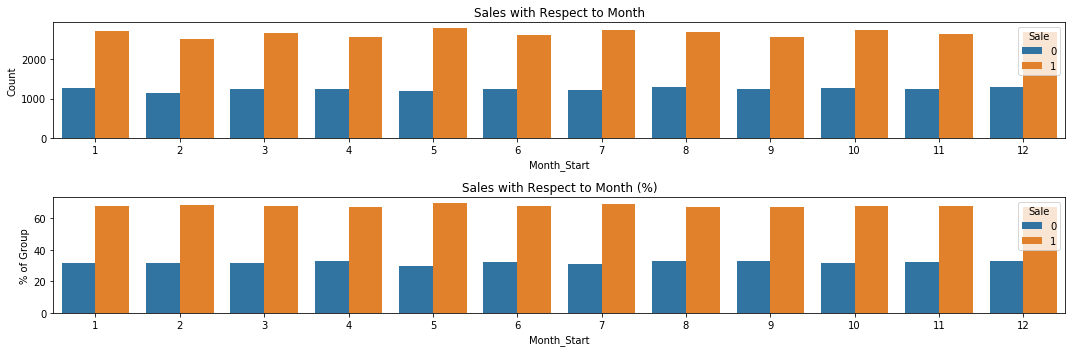

In [1349]:
m_gp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Month_Start', y='Count', hue='Sale', data=m_gp)
plt.title('Sales with Respect to Month')

df_temp = df.groupby(['Month_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Month_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Month_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Month (%)')
plt.tight_layout()
plt.show()

In [1350]:
chi2_cat_test(df, 'Month_Start')

p value of 0.176 for variable Month_Start


This p-value implies that there is some form of relationship between Month_Start and the Target (Sale)

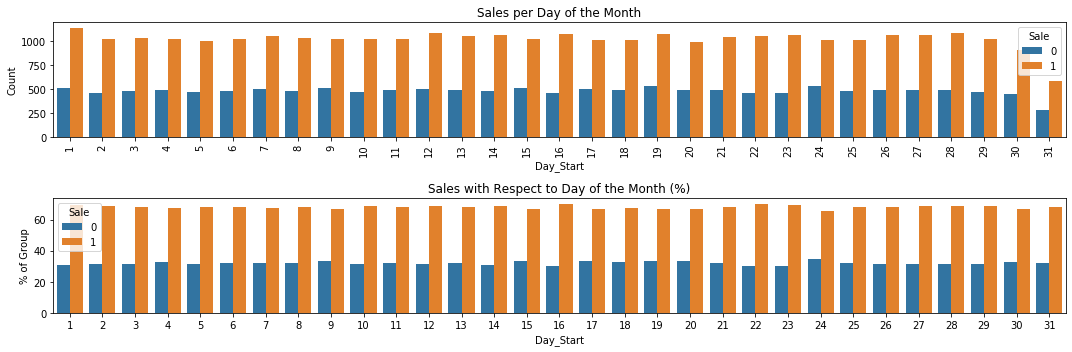

In [1351]:
d_gp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
fig = plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.barplot(x='Day_Start', y='Count', hue='Sale', data=d_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)

df_temp = df.groupby(['Day_Start', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Day_Start', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Day_Start', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Day of the Month (%)')
plt.tight_layout()
plt.show()

In [1352]:
chi2_cat_test(df, 'Day_Start')

p value of 0.82 for variable Day_Start


This p-value implies that there is much less of a relationship between Day_Start and the Target (Sale), with it being more independent from the Target than Month_Start.

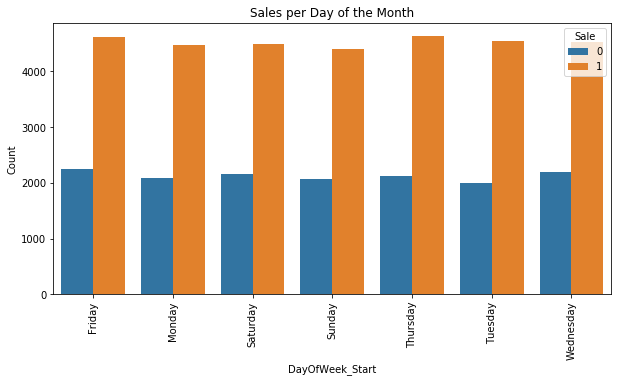

In [1353]:
dw_gp = df.groupby(['DayOfWeek_Start', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='DayOfWeek_Start', y='Count', hue='Sale', data=dw_gp)
plt.title('Sales per Day of the Month')
plt.xticks(rotation=90)
plt.show()

In [1354]:
chi2_cat_test(df, 'DayOfWeek_Start')

p value of 0.1 for variable DayOfWeek_Start


This p-value implies that there is a strong relationship between DayOfWeek_Start and the Target (Sale)

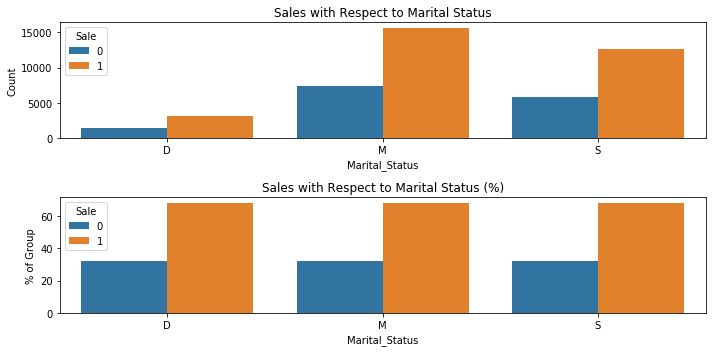

In [1355]:
df_ms = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Marital Status')

df_temp = df.groupby(['Marital_Status', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Marital_Status', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Marital_Status', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Marital Status (%)')
plt.tight_layout()
plt.show()

In [1356]:
chi2_cat_test(df, 'Marital_Status')

p value of 0.869 for variable Marital_Status


This p-value implies that there is a weak relationship between Marital_Status and the Target (Sale)

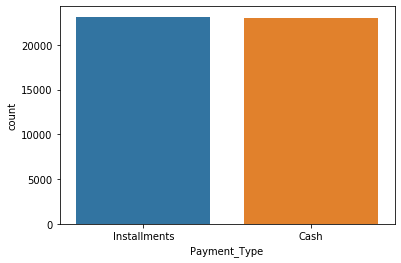

In [1357]:
sns.countplot(df.Payment_Type)

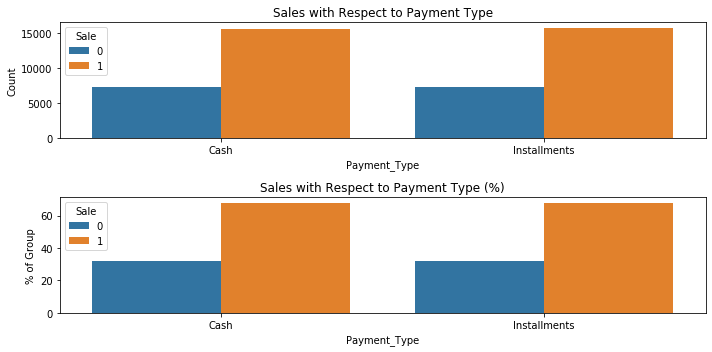

In [1358]:
df_ms = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_ms)
plt.title('Sales with Respect to Payment Type')

df_temp = df.groupby(['Payment_Type', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Payment_Type', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Payment_Type', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Payment Type (%)')
plt.tight_layout()
plt.show()


In [1359]:
chi2_cat_test(df, 'Payment_Type')

p value of 0.935 for variable Payment_Type


This p-value implies that there is a very weak relationship between Payment_Type and the Target (Sale)

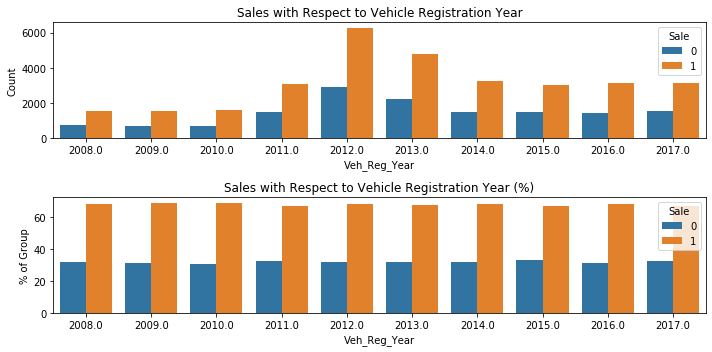

In [1360]:
df_vry = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')

fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_vry)
plt.title('Sales with Respect to Vehicle Registration Year')

df_temp = df.groupby(['Veh_Reg_Year', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Veh_Reg_Year', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Veh_Reg_Year', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Vehicle Registration Year (%)')
plt.tight_layout()
plt.show()


In [1361]:
chi2_cat_test(df, 'Veh_Reg_Year')

p value of 0.461 for variable Veh_Reg_Year


Viewing the customer that paid the highest price for their policy, and how he compares to other customers.

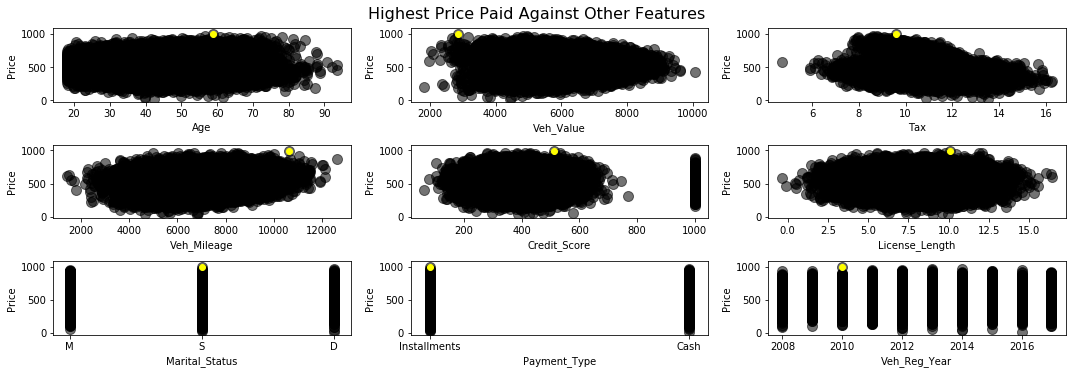

In [1362]:
cols = ['Age', 'Veh_Value', 'Tax', 'Veh_Mileage', 'Credit_Score', 'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year']

fig = plt.figure(figsize=(15,5))
i = 1
for col in cols:
    ax6 = plt.subplot(3,3,i)
    plt.scatter(df.dropna()[col], df.dropna()['Price'], facecolors='black', alpha=.55, s=100)
    plt.scatter(df.dropna().loc[df.Price>990.190554][col], df.dropna().loc[df.Price>990.190554]['Price'], color='yellow')
    ax6.set_xlabel(col)
    ax6.set_ylabel('Price')
    i+=1

fig.suptitle('Highest Price Paid Against Other Features', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

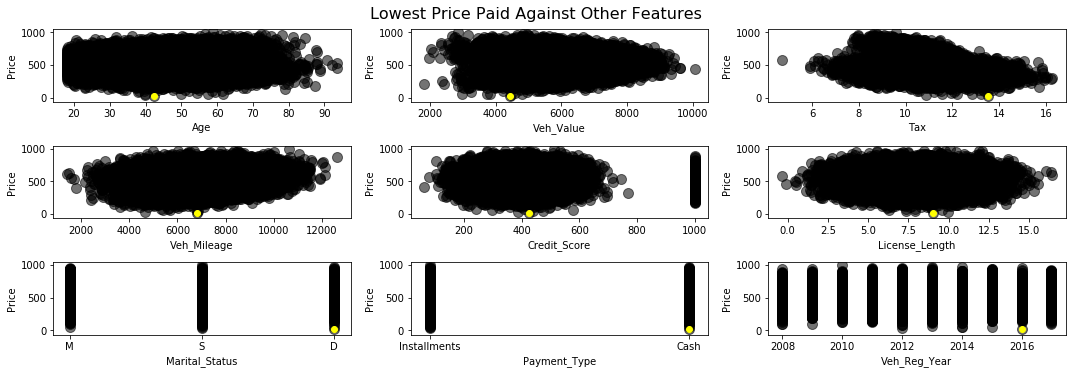

In [1363]:
cols = ['Age', 'Veh_Value', 'Tax', 'Veh_Mileage', 'Credit_Score', 'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year']

fig = plt.figure(figsize=(15,5))
i = 1
for col in cols:
    ax6 = plt.subplot(3,3,i)
    plt.scatter(df.dropna()[col], df.dropna()['Price'], facecolors='black', alpha=.55, s=100)
    plt.scatter(df.dropna().loc[df.Price<23][col], df.dropna().loc[df.Price<23]['Price'], color='yellow')
    ax6.set_xlabel(col)
    ax6.set_ylabel('Price')
    i+=1
fig.suptitle('Lowest Price Paid Against Other Features', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

One discrepancy between the two is the fact that one paid in Cash while the other via Installments. Let's investigate this further.

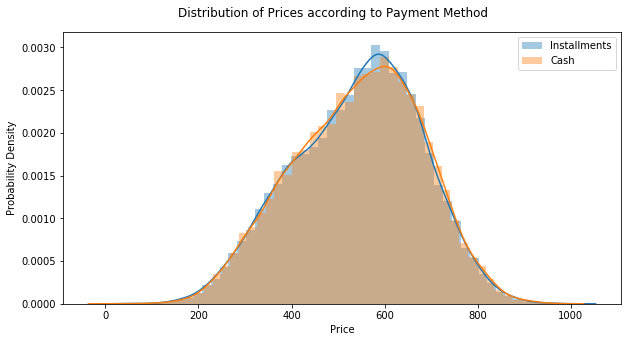

In [1364]:
df_i = df.dropna().loc[df.Payment_Type=='Installments']
df_c = df.dropna().loc[df.Payment_Type=='Cash']

fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of Prices according to Payment Method', y=0.95)
sns.distplot(df_i.Price, label='Installments')
sns.distplot(df_c.Price, label='Cash')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

This shows how they are relatively the same, i.e. paying in cash does not imply that the policy will be cheaper. Another discrepancy between the highest and lowest Prices seen in the data is the Marital Status.

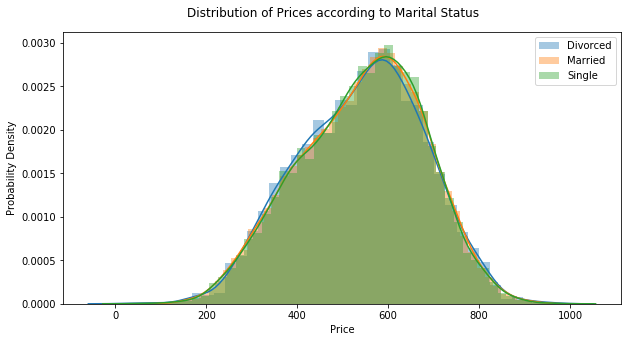

In [1365]:
df_d = df.dropna().loc[df.Marital_Status=='D']
df_m = df.dropna().loc[df.Marital_Status=='M']
df_s = df.dropna().loc[df.Marital_Status=='S']

fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of Prices according to Marital Status', y=0.95)
sns.distplot(df_d.Price, label='Divorced')
sns.distplot(df_m.Price, label='Married')
sns.distplot(df_s.Price, label='Single')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The same can be said for Marital Status

## Imputing Missing Values

Since there are missing ages in the dataframe, and a driver can obtain their license at 18, the missing ages are assumed to be 18 + the length of time that the client has had their license.

In [1366]:
df.loc[(df.Age.isnull()) & (~df.License_Length.isnull()), 'Age'] = df.License_Length + 18

Now binning vehicle values based on quantiles so as to then group by price bin, tax bin and vehicle mileage bin and apply means to missing veh_value entries.

In [1367]:
bins = [df.Veh_Mileage.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Mileage'] = pd.cut(df['Veh_Mileage'], bins=bins, labels=labels)

In [1368]:
bins = [df.Price.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Price'] = pd.cut(df['Price'], bins=bins, labels=labels)

bins = [df.Tax.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Tax'] = pd.cut(df['Tax'], bins=bins, labels=labels)

df_grpd_vv = df.groupby(['Binned_Veh_Mileage', 'Binned_Price', 'Binned_Tax'])['Veh_Value'].mean().reset_index()

for index, row in df_grpd_vv.iterrows():
    df.loc[(df.Veh_Value.isnull())
           & (df.Binned_Veh_Mileage==row.Binned_Veh_Mileage)
           & (df.Binned_Price==row.Binned_Price)
           & (df.Binned_Tax==row.Binned_Tax), 'Veh_Value'] = row['Veh_Value']

Dealing with missing Prices. Since price is the most important feature (due to its correlation with Sale), most effort will be put into imputing missing values here.

Creating new col with number of missing values per row.

In [1369]:
df['No_Missing'] = 11 - df[['Age', 'Veh_Value', 'Tax', 'Price', 'Veh_Mileage', 'Credit_Score', 'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year', 'Sale']].apply(lambda x: x.count(), axis=1)

Removing those rows with 3 (max) missing values.

In [1370]:
df.drop(df.loc[df.No_Missing==3].index, inplace=True)

In [1371]:
df_knnTrain = df.loc[(~df.Price.isnull()) & (df.No_Missing==0)]
cols_train = ['Age', 'Veh_Value', 'Tax', 'Veh_Mileage', 'Credit_Score', 'License_Length', 'Marital_Status', 'Payment_Type', 'Veh_Reg_Year', 'Year_Start', 'Month_Start', 'Day_Start', 'DayOfWeek_Start', 'Sale']
col_target = ['Price']

target_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
}
df_knnTrain.DayOfWeek_Start.replace(target_mapping, inplace=True)
target_mapping = {
    'Cash': 0,
    'Installments': 1
}
df_knnTrain.Payment_Type.replace(target_mapping, inplace=True)
target_mapping = {
    'D': 0,
    'M': 1,
    'S': 2
}
df_knnTrain.Marital_Status.replace(target_mapping, inplace=True)


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(df_knnTrain[cols_train].values, df_knnTrain[col_target].values)
# df_knnTrain[cols_train].values.shape

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [1372]:
df_missing_price = df.loc[(df.Price.isnull()) & (df.No_Missing==1)][['Age',
                                                  'Veh_Value',
                                                  'Tax',
                                                  'Veh_Mileage',
                                                  'Credit_Score',
                                                  'License_Length',
                                                  'Marital_Status',
                                                  'Payment_Type',
                                                  'Veh_Reg_Year',
                                                  'Year_Start',
                                                  'Month_Start',
                                                  'Day_Start',
                                                  'DayOfWeek_Start',
                                                  'Sale']]

target_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
}
df_missing_price.DayOfWeek_Start.replace(target_mapping, inplace=True)
target_mapping = {
    'Cash': 0,
    'Installments': 1
}
df_missing_price.Payment_Type.replace(target_mapping, inplace=True)
target_mapping = {
    'D': 0,
    'M': 1,
    'S': 2
}
df_missing_price.Marital_Status.replace(target_mapping, inplace=True)

for index, row in df_missing_price.iterrows():
    df.at[index, 'Price'] = knn.predict(np.ndarray.flatten(row.values).reshape(1,-1))[0][0]

In [1373]:
df.loc[df.Tax.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Binned_Age,Binned_Credit_Score,Year_Start,Month_Start,Day_Start,DayOfWeek_Start,Binned_Veh_Mileage,Binned_Price,Binned_Tax,No_Missing
97,58.421368,5790.967653,NaN,404.956070,NaN,423.479659,6.743566,S,Cash,2012.0,0,55-60,400.26-455.04,2016,3,23,Wednesday,NaN,1,NaN,2
236,37.053858,4769.900683,NaN,229.230413,7035.661803,389.184631,6.438842,M,Installments,2015.0,0,35-40,346.35-400.25,2016,8,18,Thursday,3,1,NaN,1
496,52.473465,6877.785698,NaN,518.674537,8571.028706,436.651100,9.608121,M,Cash,2013.0,0,50-55,400.26-455.04,2016,10,4,Tuesday,4,2,NaN,1
577,66.461762,6238.530007,NaN,420.777358,7062.111182,235.306403,6.556205,M,Installments,2013.0,0,65-70,55.89-346.34,2016,9,19,Monday,3,1,NaN,1
689,55.385425,4675.222624,NaN,266.716763,5281.266771,317.365946,5.231780,M,Installments,2016.0,0,55-60,55.89-346.34,2016,6,15,Wednesday,1,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49392,33.879938,6496.445408,NaN,463.054470,4971.182013,312.784614,6.089155,M,Cash,2016.0,1,30-35,55.89-346.34,2016,5,4,Wednesday,1,2,NaN,1
49447,37.270111,6223.592936,NaN,864.932360,8947.636889,374.429362,9.932578,S,Installments,2015.0,1,35-40,346.35-400.25,2016,5,8,Sunday,4,4,NaN,1
49522,36.588651,7034.517893,NaN,646.542295,8190.809216,262.152130,8.669170,S,Installments,2009.0,1,35-40,55.89-346.34,2016,3,26,Saturday,4,4,NaN,1
49749,31.838826,7313.048308,NaN,553.438336,4819.926621,347.467023,9.157307,S,Cash,2013.0,1,30-35,346.35-400.25,2016,9,17,Saturday,1,2,NaN,1


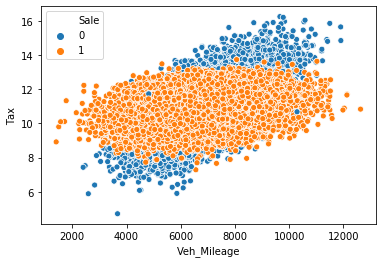

In [1374]:
sns.scatterplot(x='Veh_Mileage', y='Tax', hue='Sale', data=df)

The data has a differing relationship when looking at Sale. Therefore two linear models will be created to take advantage of this.

In [1375]:
explore(df)

                  index    dtypes                 Name  Missing  Total  \
0                   Age   float64                  Age        3  46580   
1             Veh_Value   float64            Veh_Value       13  46570   
2                   Tax   float64                  Tax      480  46103   
3                 Price   float64                Price       39  46544   
4           Veh_Mileage   float64          Veh_Mileage      474  46109   
5          Credit_Score   float64         Credit_Score      457  46126   
6        License_Length   float64       License_Length      489  46094   
7        Marital_Status    object       Marital_Status      448  46135   
8          Payment_Type    object         Payment_Type      443  46140   
9          Veh_Reg_Year   float64         Veh_Reg_Year      457  46126   
10                 Sale     int64                 Sale        0  46583   
11           Binned_Age  category           Binned_Age      510  46073   
12  Binned_Credit_Score  category  Bin

In [1376]:
from sklearn.linear_model import LinearRegression

df_tax = df.loc[(df.Tax.isnull()) & (~df.Veh_Mileage.isnull())]
df_tax_nn_p = df.loc[(~df.Tax.isnull()) & (~df.Veh_Mileage.isnull()) & (df.Sale==1)][['Tax', 'Veh_Mileage']]
df_tax_nn_n = df.loc[(~df.Tax.isnull()) & (~df.Veh_Mileage.isnull()) & (df.Sale==0)][['Tax', 'Veh_Mileage']]

reg_p = LinearRegression().fit(df_tax_nn_p.Veh_Mileage.values.reshape(-1,1), df_tax_nn_p.Tax.values.reshape(-1,1))
reg_n = LinearRegression().fit(df_tax_nn_n.Veh_Mileage.values.reshape(-1,1), df_tax_nn_n.Tax.values.reshape(-1,1))

for index, row in df_tax.iterrows():
    if row.Sale == 1:
        df.at[index, 'Tax'] = reg_p.predict([[row.Veh_Mileage]])
    elif row.Sale == 0:
        df.at[index, 'Tax'] = reg_n.predict([[row.Veh_Mileage]])

In [1377]:
explore(df)

                  index    dtypes                 Name  Missing  Total  \
0                   Age   float64                  Age        3  46580   
1             Veh_Value   float64            Veh_Value       13  46570   
2                   Tax   float64                  Tax        7  46576   
3                 Price   float64                Price       39  46544   
4           Veh_Mileage   float64          Veh_Mileage      474  46109   
5          Credit_Score   float64         Credit_Score      457  46126   
6        License_Length   float64       License_Length      489  46094   
7        Marital_Status    object       Marital_Status      448  46135   
8          Payment_Type    object         Payment_Type      443  46140   
9          Veh_Reg_Year   float64         Veh_Reg_Year      457  46126   
10                 Sale     int64                 Sale        0  46583   
11           Binned_Age  category           Binned_Age      510  46073   
12  Binned_Credit_Score  category  Bin

In [1378]:
df.corr()[['Veh_Value', 'Tax', 'Veh_Mileage']]

,Veh_Value,Tax,Veh_Mileage
Age,-0.254859,-0.179561,-0.147506
Veh_Value,1.000000,0.178096,-0.155195
Tax,0.178096,1.000000,0.405775
Price,-0.088572,-0.336468,0.157440
Veh_Mileage,-0.155195,0.405775,1.000000
Credit_Score,-0.008739,0.002068,0.003718
License_Length,0.004519,-0.003271,0.001008
Veh_Reg_Year,-0.002079,0.002611,0.006842
Sale,-0.041329,-0.045612,-0.022587
Year_Start,NaN,NaN,NaN


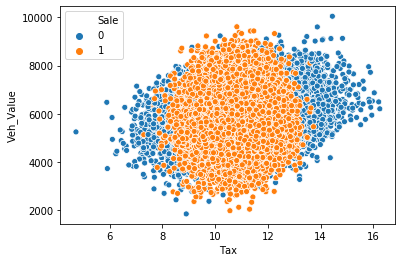

In [1379]:
sns.scatterplot(x='Tax', y='Veh_Value', hue='Sale', data=df)

In [1380]:
# value via tax
from sklearn.linear_model import LinearRegression

df.loc[(~df.Tax.isnull()) & (df.Veh_Value.isnull())]
# df_tax_nn_p = df.loc[(~df.Tax.isnull()) & (~df.Veh_Mileage.isnull()) & (df.Sale==1)][['Tax', 'Veh_Mileage']]
# df_tax_nn_n = df.loc[(~df.Tax.isnull()) & (~df.Veh_Mileage.isnull()) & (df.Sale==0)][['Tax', 'Veh_Mileage']]

# reg_p = LinearRegression().fit(df_tax_nn_p.Veh_Mileage.values.reshape(-1,1), df_tax_nn_p.Tax.values.reshape(-1,1))
# reg_n = LinearRegression().fit(df_tax_nn_n.Veh_Mileage.values.reshape(-1,1), df_tax_nn_n.Tax.values.reshape(-1,1))

# for index, row in df_tax.iterrows():
#     if row.Sale == 1:
#         df.at[index, 'Tax'] = reg_p.predict([[row.Veh_Mileage]])
#     elif row.Sale == 0:
#         df.at[index, 'Tax'] = reg_n.predict([[row.Veh_Mileage]])

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Binned_Age,Binned_Credit_Score,Year_Start,Month_Start,Day_Start,DayOfWeek_Start,Binned_Veh_Mileage,Binned_Price,Binned_Tax,No_Missing
25,54.520716,NaN,12.079819,NaN,8209.397320,470.666040,6.762009,M,Cash,2009.0,0,50-55,455.05-999,2016,12,19,Monday,4,NaN,4,2
4922,46.381081,NaN,10.073810,NaN,8022.259407,372.598643,7.037395,D,Installments,2011.0,0,45-50,346.35-400.25,2016,5,3,Tuesday,4,NaN,1,2
5303,62.605276,NaN,11.530463,364.444793,7719.143991,473.774511,7.615790,M,Cash,2012.0,0,60-65,455.05-999,2016,1,20,Wednesday,3,1,NaN,2
6430,51.328434,NaN,9.476766,NaN,5549.964885,432.593844,8.676730,M,Cash,2016.0,0,50-55,400.26-455.04,2016,7,11,Monday,1,NaN,1,2
20195,34.163101,NaN,11.064528,429.600760,8081.448128,473.239505,10.036397,S,Installments,2012.0,1,30-35,455.05-999,2016,12,22,Thursday,4,1,NaN,2
25828,39.595972,NaN,10.274895,NaN,5382.327289,348.996260,7.227177,D,Cash,2015.0,1,35-40,346.35-400.25,2016,2,8,Monday,1,NaN,1,2
35749,44.595384,NaN,10.789752,628.006744,6276.444937,256.039679,8.953737,S,Installments,2012.0,1,40-45,55.89-346.34,2016,11,12,Saturday,2,3,NaN,2
37559,40.136183,NaN,11.281352,694.731882,9505.761937,354.877695,5.215089,S,Installments,2013.0,1,40-45,346.35-400.25,2016,1,9,Saturday,4,4,NaN,2
41045,27.540923,NaN,10.987829,NaN,7950.280872,498.679677,8.557964,S,Installments,2011.0,1,25-30,455.05-999,2016,3,17,Thursday,4,NaN,3,2
43964,35.945706,NaN,10.953789,NaN,7835.804934,494.248932,11.743274,M,Installments,2016.0,1,35-40,455.05-999,2016,8,11,Thursday,4,NaN,3,2


In [1381]:
df.loc[df.Tax.isnull()]

,Age,Veh_Value,Tax,Price,Veh_Mileage,Credit_Score,License_Length,Marital_Status,Payment_Type,Veh_Reg_Year,Sale,Binned_Age,Binned_Credit_Score,Year_Start,Month_Start,Day_Start,DayOfWeek_Start,Binned_Veh_Mileage,Binned_Price,Binned_Tax,No_Missing
97,58.421368,5790.967653,NaN,404.956070,NaN,423.479659,6.743566,S,Cash,2012.0,0,55-60,400.26-455.04,2016,3,23,Wednesday,NaN,1,NaN,2
10679,45.437118,6821.122165,NaN,446.312989,NaN,431.098423,7.029733,M,Installments,2017.0,0,45-50,400.26-455.04,2016,12,6,Tuesday,NaN,2,NaN,2
14117,52.995113,4152.739772,NaN,410.734297,NaN,484.467579,9.621144,S,Cash,2013.0,0,50-55,455.05-999,2016,3,9,Wednesday,NaN,1,NaN,2
29892,20.533752,8294.929823,NaN,415.953838,NaN,418.369506,8.189648,S,Installments,2013.0,1,18-25,400.26-455.04,2016,1,29,Friday,NaN,1,NaN,2
37051,38.821340,7470.325484,NaN,567.010227,NaN,396.647817,9.102655,S,Installments,2013.0,1,35-40,346.35-400.25,2016,4,17,Sunday,NaN,3,NaN,2
39361,28.549135,5779.702053,NaN,501.126625,NaN,532.109025,6.601490,D,Cash,2015.0,1,25-30,455.05-999,2016,1,1,Friday,NaN,2,NaN,2
39753,45.853946,5657.060598,NaN,523.180173,NaN,471.114221,9.561220,M,Cash,2017.0,1,45-50,455.05-999,2016,10,18,Tuesday,NaN,2,NaN,2


After referring to the split across Sale, payment type is seen to contain 2 unique values that are almost split 50/50. Therefore when imputing missing Payment_Type values in the dataframe, the missing values are filled with the same ratio of what is already there.

In [1382]:
df_notnull = df.Payment_Type.isnull()
df_notnull = df_notnull[df_notnull==True].index
len_dfnn = len(df_notnull)
df.loc[df_notnull[0:int(len_dfnn/2)], 'Payment_Type'] = 'Installments'
df.loc[df_notnull[int(len_dfnn/2):len_dfnn], 'Payment_Type'] = 'Cash'

Filling in null values in license length. This is to be dependant on age, with 3 age bins being defined (as usually done when insuring cars). These are:
* The 18-25 group
* 25-65 group
* 65+ group

In [1383]:
bins = [17,25,65,95]
labels = ['18-25', '26-65', '66-95']
df['Binned_Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [1384]:
df_ba = df.groupby('Binned_Age')['License_Length'].mean().reset_index()

for index, row in df_ba.iterrows():
    df.loc[(df.Binned_Age==row.Binned_Age) & (df.License_Length.isnull()), 'License_Length'] = row.License_Length

In [1385]:
df.drop(df.loc[df.License_Length.isnull()].index,inplace=True)

In [1386]:
chi2_feat_test(df, 'Marital_Status', 'Binned_Credit_Score')

p value of 0.387 for variable Marital_Status


This implies there is a relationship between the binned credit score and marital status.

## Adding Features

In [1387]:
# applying bins to Veh_Value/Tax/Price to then be grouped by 

bins = [df.Veh_Value.quantile(i) for i in [0, 0.25, 0.5, 0.75, 1]]
labels = [1, 2, 3, 4]
df['Binned_Veh_Value'] = pd.cut(df['Veh_Value'], bins=bins, labels=labels)

In [1388]:
cols = ['Price', 'Veh_Value', 'Tax']
grpd = df.groupby(['Binned_Price', 'Binned_Veh_Value', 'Binned_Tax'])
sums = grpd[cols].sum().add_suffix('_sum')
avgs = grpd[cols].mean().add_suffix('_mean')

grpd_df = pd.concat([sums, avgs], axis=1).reset_index()

cols_add = ['Price_sum', 'Veh_Value_sum', 'Tax_sum', 'Price_mean', 'Veh_Value_mean', 'Tax_mean']

for index, row in grpd_df.iterrows():
    for col in cols_add:
        df.loc[(df['Binned_Price']==row['Binned_Price'])
                         & (df['Binned_Veh_Value']==row['Binned_Veh_Value'])
                         & (df['Binned_Tax']==row['Binned_Tax']), col] = row[col]
    

## Encoding

Encoding cyclic variables

In [1389]:
df['Month_Start_sin'] = np.sin(df['Month_Start'] * (2. * np.pi / 12))
df['Month_Start_cos'] = np.cos(df['Month_Start'] * (2. * np.pi / 12))

df['Day_Start_sin'] = np.sin(df['Day_Start'] * (2. * np.pi / 30))
df['Day_Start_cos'] = np.cos(df['Day_Start'] * (2. * np.pi / 30))

target_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
}
df.DayOfWeek_Start.replace(target_mapping, inplace=True)

df['DayOfWeek_Start_sin'] = np.sin(df['DayOfWeek_Start'] * (2. * np.pi / 6))
df['DayOfWeek_Start_cos'] = np.cos(df['DayOfWeek_Start'] * (2. * np.pi / 6))

df.drop(['Month_Start', 'Day_Start', 'DayOfWeek_Start'], axis=1, inplace=True)

Due to Year_Start only containing 2016, it is dropped. (Contains no added information)

In [1390]:
df.drop('Year_Start', inplace=True, axis=1)

Encoding categorical variables

In [1391]:
df.loc[df.Marital_Status.isnull(), 'Marital_Status'] = df.Marital_Status.value_counts().index[0]

In [1392]:
linspaceArr = np.linspace(0, 1, 11)
bins = [df.Veh_Mileage.quantile(i) for i in linspaceArr]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['Binned_Veh_Mileage'] = pd.cut(df['Veh_Mileage'], bins=bins, labels=labels)

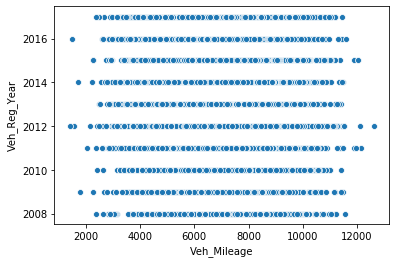

In [1393]:
# sns.distplot(df.loc[~df.Veh_Reg_Year.isnull()].Veh_Reg_Year)
sns.scatterplot(x='Veh_Mileage', y='Veh_Reg_Year', data=df)

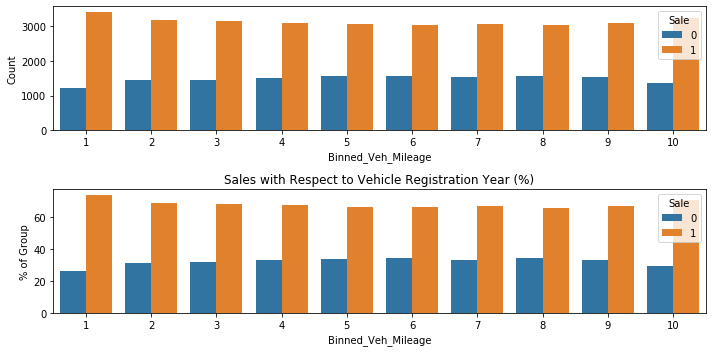

In [1394]:
df_bvm = df.groupby(['Binned_Veh_Mileage', 'Sale']).size().reset_index(name='Count')
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.barplot(x='Binned_Veh_Mileage', y='Count', hue='Sale', data=df_bvm)

df_temp = df.groupby(['Binned_Veh_Mileage', 'Sale']).size().reset_index(name='Count')
df_temp2 = df_temp.groupby(['Binned_Veh_Mileage', 'Sale']).agg({'Count': 'sum'})
df_temp2 = df_temp2.groupby(level=0).apply(lambda x: 100 * x/float(x.sum())).reset_index()
plt.subplot(2,1,2)
ax = sns.barplot(x='Binned_Veh_Mileage', y='Count', hue='Sale', data=df_temp2)
plt.ylabel('% of Group')
plt.title('Sales with Respect to Vehicle Registration Year (%)')
plt.tight_layout()
plt.show()

In [1395]:
target_mapping = {
    'M': 0,
    'D': 1,
    'S': 2
}
df.Marital_Status.replace(target_mapping, inplace=True)

In [1396]:
target_mapping = {
    'Installments': 0,
    'Cash': 1
}
df.Payment_Type.replace(target_mapping, inplace=True)

In [1397]:
df = df.dropna()

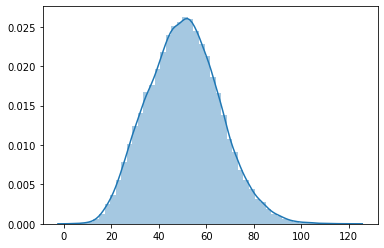

In [1398]:
sns.distplot((df.Price/df.Tax).dropna())

## Modelling

Feature importance metric based on [this article](https://academic.oup.com/bioinformatics/article/26/10/1340/193348), using a lightGBM model in Random Forest setting to fit the data. The steps are as follows:
* Create null importance distributions, that is fitting the model on shuffled versions of the target so as to see how the model can make sense of each feature.
* Fit the model again but now on the original data, collecting the feature importances.
* For each feature:
    *  Compute probability of actual importance with respect to the null distribution
    * Compare the actual importance to the mean and max of the null importances

In [1399]:
from sklearn.model_selection import train_test_split

target_y = df.Sale
modelling_df = df.drop(['Sale', 'Binned_Veh_Mileage', 'Binned_Credit_Score', 'Binned_Price', 'Binned_Tax', 'No_Missing', 'Binned_Age', 'Binned_Veh_Value'], axis=1)

### Feature Importances

In [1400]:
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

def get_feature_importances(data_x, data_y, shuffle, seed=None):
    # Gather real features
    train_features = [f for f in data_x]
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = data_y.copy()
    if shuffle:
        # Here you could as well use a binomial distribution
        y = target_y.copy().sample(frac=1.0)
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(data_x, y, free_raw_data=False, silent=True)
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
        'n_jobs': 4
    }
    
    categorical_feats=['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']
#     categorical_feats=['Marital_Status_0', 'Marital_Status_1', 'Marital_Status_2',
#        'Payment_Type_0', 'Payment_Type_1', 'Veh_Reg_Year_2008.0',
#        'Veh_Reg_Year_2009.0', 'Veh_Reg_Year_2010.0',
#        'Veh_Reg_Year_2011.0', 'Veh_Reg_Year_2012.0',
#        'Veh_Reg_Year_2013.0', 'Veh_Reg_Year_2014.0',
#        'Veh_Reg_Year_2015.0', 'Veh_Reg_Year_2016.0',
#        'Veh_Reg_Year_2017.0']
    # Fit the model
    clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200, categorical_feature=categorical_feats)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    imp_df['trn_score'] = roc_auc_score(y, clf.predict(modelling_df[train_features]))
    
    return imp_df, clf

In [1401]:
actual_imp_df, _ = get_feature_importances(modelling_df, target_y, False)

categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']


In [1402]:
# null_imp_df = pd.DataFrame()
# nb_runs = 80
# import time
# start = time.time()
# dsp = ''
# for i in range(nb_runs):
#     # Get current run importances
#     imp_df, _ = get_feature_importances(data_x=modelling_df, data_y=target_y, shuffle=True)
#     imp_df['run'] = i + 1 
#     # Concat the latest importances with the old ones
#     null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
#     # Display current run and time used
#     spent = (time.time() - start) / 60
#     dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
#     print(dsp, end='', flush=True)

In [1403]:
import matplotlib.gridspec as gridspec
def display_distributions(actual_imp_df_, null_imp_df_, feature_):
    plt.figure(figsize=(13, 6))
    gs = gridspec.GridSpec(1, 2)
    # Plot Split importances
    ax = plt.subplot(gs[0, 0])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_split'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_split'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Split Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (split) Distribution for %s ' % feature_.upper())
    # Plot Gain importances
    ax = plt.subplot(gs[0, 1])
    a = ax.hist(null_imp_df_.loc[null_imp_df_['feature'] == feature_, 'importance_gain'].values, label='Null importances')
    ax.vlines(x=actual_imp_df_.loc[actual_imp_df_['feature'] == feature_, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(a[0]), color='r',linewidth=10, label='Real Target')
    ax.legend()
    ax.set_title('Gain Importance of %s' % feature_.upper(), fontweight='bold')
    plt.xlabel('Null Importance (gain) Distribution for %s ' % feature_.upper())

In [1404]:
# for feat in modelling_df.columns.values:
#     display_distributions(actual_imp_df_=actual_imp_df, null_imp_df_=null_imp_df, feature_=feat)

In [1405]:
# np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))


In [1406]:
# feature_scores = []
# for _f in actual_imp_df['feature'].unique():
#     f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
#     f_act_imps_gain = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].mean()
#     gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid divide by zero
#     f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
#     f_act_imps_split = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_split'].mean()
#     split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid divide by zero
#     feature_scores.append((_f, split_score, gain_score))

# scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

# plt.figure(figsize=(10, 5))
# gs = gridspec.GridSpec(1, 2)
# # Plot Split importances
# ax = plt.subplot(gs[0, 0])
# sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
# ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# # Plot Gain importances
# ax = plt.subplot(gs[0, 1])
# sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
# ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
# plt.tight_layout()

In [1407]:
non, clf = get_feature_importances(data_x=modelling_df, data_y=target_y, shuffle=True)

categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']


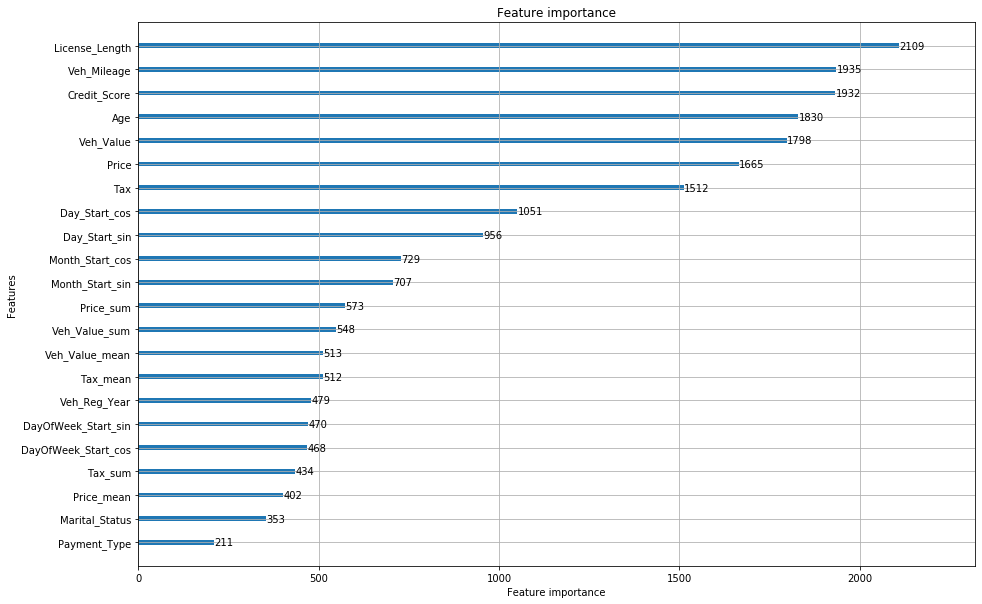

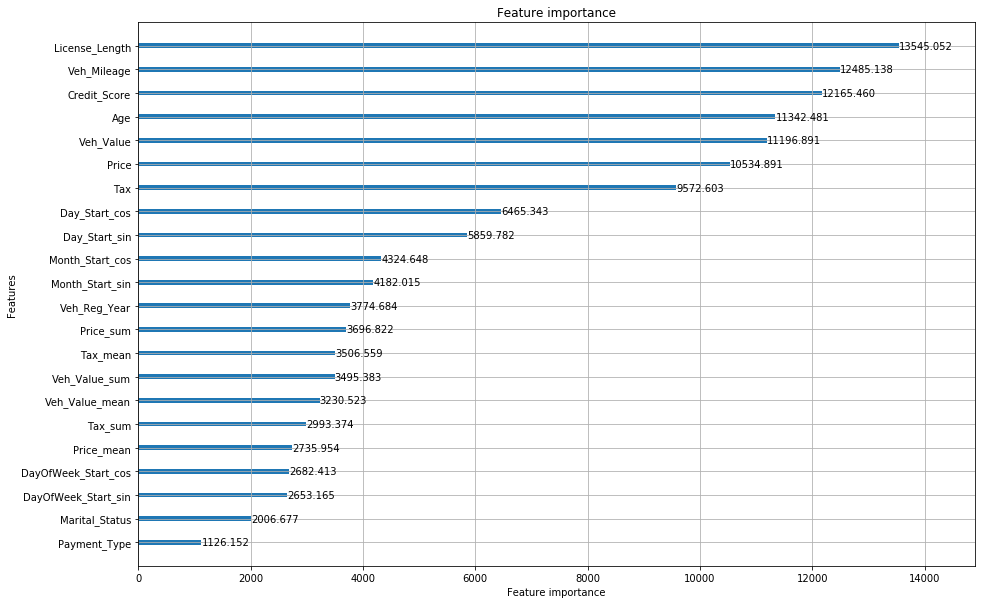

In [1408]:
lgb.plot_importance(clf, importance_type='split', figsize=(15,10))
lgb.plot_importance(clf, importance_type='gain', figsize=(15,10))

categorical_feature in Dataset is overridden.
New categorical_feature is ['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']


[1]	valid_0's binary_logloss: 0.550884
[2]	valid_0's binary_logloss: 0.488127
[3]	valid_0's binary_logloss: 0.433831
[4]	valid_0's binary_logloss: 0.3933
[5]	valid_0's binary_logloss: 0.359574
[6]	valid_0's binary_logloss: 0.325528
[7]	valid_0's binary_logloss: 0.29833
[8]	valid_0's binary_logloss: 0.27517
[9]	valid_0's binary_logloss: 0.253508
[10]	valid_0's binary_logloss: 0.235669
[11]	valid_0's binary_logloss: 0.216967
[12]	valid_0's binary_logloss: 0.202731
[13]	valid_0's binary_logloss: 0.190891
[14]	valid_0's binary_logloss: 0.179787
[15]	valid_0's binary_logloss: 0.170533
[16]	valid_0's binary_logloss: 0.161747
[17]	valid_0's binary_logloss: 0.153086
[18]	valid_0's binary_logloss: 0.143575
[19]	valid_0's binary_logloss: 0.138636
[20]	valid_0's binary_logloss: 0.1328
[21]	valid_0's binary_logloss: 0.12533
[22]	valid_0's binary_logloss: 0.118801
[23]	valid_0's binary_logloss: 0.11495
[24]	valid_0's binary_logloss: 0.109839
[25]	valid_0's binary_logloss: 0.104686
[26]	valid_0's bi

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


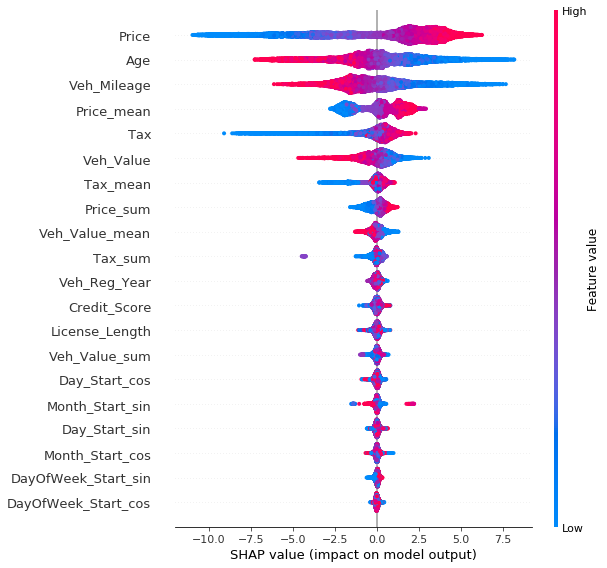

In [1409]:
import shap

def shapRanking(x_data, y_data):
    train_x, valid_x, train_y, valid_y = train_test_split(
        x_data, y_data, test_size=0.33, random_state=42)

    train_data = lgb.Dataset(train_x, label=train_y)
    valid_data = lgb.Dataset(valid_x, label=valid_y)
    seed = None
    
    lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': seed,
        'bagging_freq': 1,
#         'metric': 'auc',
        'boosting': 'gbdt',
        'n_jobs': 4,
    }
    
    categorical_feats=['Marital_Status', 'Payment_Type', 'Veh_Reg_Year']

    lgb_model = lgb.train(params=lgb_params, train_set=train_data, valid_sets=(valid_data,), num_boost_round=200, categorical_feature=categorical_feats)
#     lgb_model = lgb.train(params=lgb_params, train_set=train_data, valid_sets=(valid_data,), num_boost_round=200)

    explainer = shap.TreeExplainer(lgb_model).shap_values(valid_x)
    shap.summary_plot(explainer[1], valid_x)
    plt.show()
    
    return explainer, valid_x, lgb_model
    
explainer, valid_x, model = shapRanking(modelling_df, target_y)

In [1410]:
expl = shap.TreeExplainer(model)
shap_vals = expl.shap_values(valid_x)

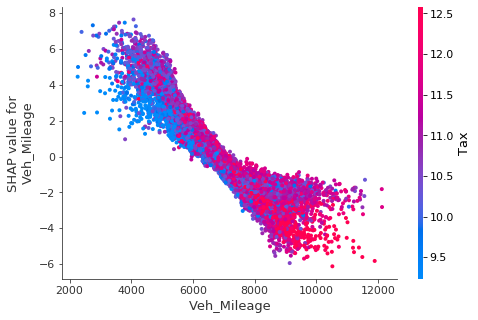

In [1411]:
shap.dependence_plot('Veh_Mileage', explainer[1], valid_x)

Here we can see how as the vehicle mileage increases, the tax is also seen to increase. This makes sense as vehicles that have a larger mileage usually means they are older and therefore taxed at a higher rate due to emissions etc.

What we are seeing here is that as the vehicle mileage increases, the impact that this feature has on the prediction is greatly reduced.

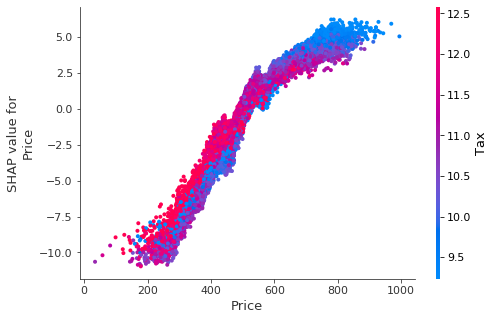

In [1412]:
shap.dependence_plot('Price', explainer[1], valid_x)

These plots help us to understand the individual impacts of features on the Target variable, whilst also showing interaction effects.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


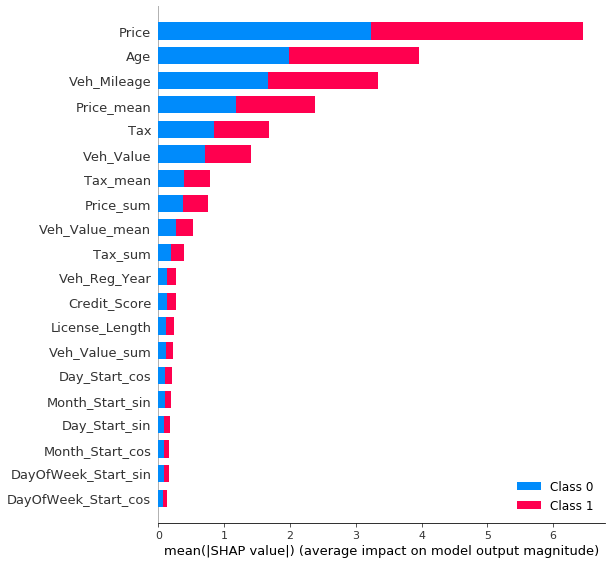

In [1413]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(valid_x)

shap.summary_plot(shap_values, valid_x, plot_type="bar")

Seeing effect of dimensionality reduction. This is to be done on the least important features defined by the feature ranking methods listed previously.

In [1414]:
# from sklearn.decomposition import PCA

# cols = ['Veh_Reg_Year', 'Payment_Type', 'Credit_Score']

# pca = PCA(n_components=1, svd_solver='full')
# modelling_df['PCA_Cols'] = pca.fit_transform(modelling_df[cols])
# modelling_df.drop(cols, inplace=True, axis=1)

Reduces accuracy and all metrics

In [1415]:
modelling_df.drop(['Marital_Status', 'Payment_Type', 'License_Length'], inplace=True, axis=1)

In [1416]:
train_x, test_x, train_y, test_y = train_test_split(modelling_df, target_y, test_size=0.2)

In [1417]:
import lightgbm as lgb

train_X, valid_X, train_Y, valid_Y = train_test_split(
        train_x, train_y, test_size=0.33)

train_data = lgb.Dataset(train_X, label=train_Y)
valid_data = lgb.Dataset(valid_X, label=valid_Y)

params = {
    'objective': 'binary',
    'boosting': 'gbdt',
    'seed': 123
}

print('Starting training...')
# train
gbm = lgb.train(params,
                train_data,
                num_boost_round=2000,
                valid_sets=valid_data,
                early_stopping_rounds=50,
               )

Starting training...
[1]	valid_0's binary_logloss: 0.548706
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.486475
[3]	valid_0's binary_logloss: 0.435755
[4]	valid_0's binary_logloss: 0.393327
[5]	valid_0's binary_logloss: 0.357059
[6]	valid_0's binary_logloss: 0.32618
[7]	valid_0's binary_logloss: 0.299426
[8]	valid_0's binary_logloss: 0.275648
[9]	valid_0's binary_logloss: 0.254468
[10]	valid_0's binary_logloss: 0.236029
[11]	valid_0's binary_logloss: 0.219208
[12]	valid_0's binary_logloss: 0.204723
[13]	valid_0's binary_logloss: 0.191997
[14]	valid_0's binary_logloss: 0.180379
[15]	valid_0's binary_logloss: 0.169893
[16]	valid_0's binary_logloss: 0.160419
[17]	valid_0's binary_logloss: 0.151988
[18]	valid_0's binary_logloss: 0.144403
[19]	valid_0's binary_logloss: 0.137323
[20]	valid_0's binary_logloss: 0.130842
[21]	valid_0's binary_logloss: 0.125058
[22]	valid_0's binary_logloss: 0.119849
[23]	valid_0's binary_logloss: 0.115258
[24]	val

In [1418]:
from sklearn.metrics import recall_score, f1_score, roc_auc_score, accuracy_score

y_prob = gbm.predict(test_x.values, num_iteration=gbm.best_iteration)
y_pred = [round(x) for x in y_prob]

print('Accuracy LGBM:', np.round(accuracy_score(y_pred, test_y) * 100, 3), '%')
print('AOC ROC:', np.round(roc_auc_score(test_y.values, y_prob) * 100, 3), '%')
print('Recall score:', np.round(recall_score(test_y, y_pred) * 100, 3), '%')
print('F1 score:', np.round(f1_score(test_y, y_pred) * 100, 3), '%')

Accuracy LGBM: 98.487 %
AOC ROC: 99.419 %
Recall score: 98.854 %
F1 score: 98.887 %


<Figure size 432x288 with 0 Axes>

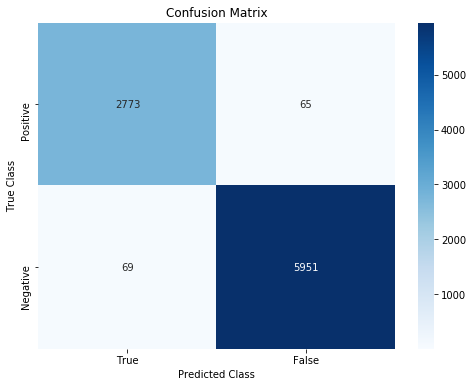

In [1419]:
from sklearn.metrics import confusion_matrix
plt.figure()
cm = confusion_matrix(test_y, y_pred)
labels_x = ['True', 'False']
labels_y = ['Positive', 'Negative']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels_x, yticklabels = labels_y, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()